In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Brain Dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [3]:

 # This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain Dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())       


data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [11]:
result = np.array(result)
len(result)
result = result.reshape(2891,2)
print(result)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
#print(model.summary())


y_train.shape

history = model.fit(x_train, y_train, epochs = 11, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/11
58/58 [==============================] - 149s 3s/step - loss: 8.9150 - val_loss: 0.8283
Epoch 2/11
58/58 [==============================] - 151s 3s/step - loss: 0.4413 - val_loss: 0.4480
Epoch 3/11
58/58 [==============================] - 149s 3s/step - loss: 0.2370 - val_loss: 0.3883
Epoch 4/11
58/58 [==============================] - 141s 2s/step - loss: 0.1719 - val_loss: 0.4002
Epoch 5/11
58/58 [==============================] - 142s 2s/step - loss: 0.1379 - val_loss: 0.3790
Epoch 6/11
58/58 [==============================] - 134s 2s/step - loss: 0.1222 - val_loss: 0.3492
Epoch 7/11
58/58 [==============================] - 133s 2s/step - loss: 0.0925 - val_loss: 0.3257
Epoch 8/11
58/58 [==============================] - 134s 2s/step - loss: 0.0812 - val_loss: 0.3358
Epoch 9/11
58/58 [==============================] - 134s 2s/step - loss: 0.0655 - val_loss: 0.2986
Epoch 10/11
58/58 [==============================] - 134s 2s/step - loss: 0.0544 - val_loss: 0.2806
Epoch 11/

In [23]:
def names(number):
    if number==0:
        return 'it has  a Tumor'
        a==1
    else:
        return 'there are no tumor'
        a==0

In [17]:
import gc
import pickle
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pick_insert = open('drive/My Drive/data.pickle','wb')
pickle.dump(data, pick_insert)
pick_insert.close()

Mounted at /content/drive


99.63797926902771% Confidence there are no tumor


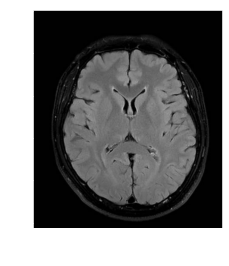

In [24]:
import matplotlib.pyplot as plt
img = Image.open(r"/content/pred53.jpg")
plt.xlabel('Sample Image')
plt.imshow(img)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]

print(str(res[0][classification]*100) + '% Confidence ' + names(classification))